In [6]:
# Eksploracyjna analiza danych (EDA)

# START

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/IT/SDA-AI/data/data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# 1. Missing Values

df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [10]:
df.dropna() # Drops rows with any missing values
df.dropna(axis=1) # Drops columns with any missing values

,Make,Model,Year,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


In [18]:
# 2. Data Type Conversion

df.dtypes

df['Year'] = pd.to_datetime(df['Year']) # Convert to datetime

<Axes: >

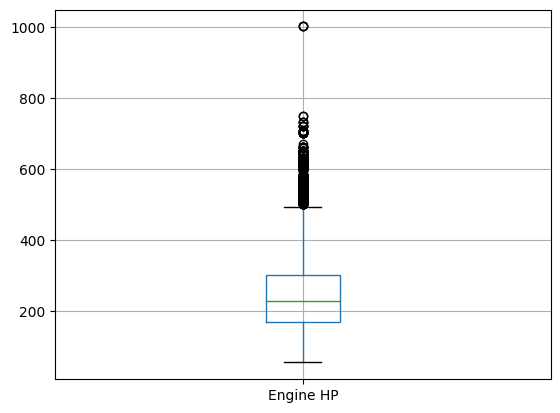

In [22]:
# 3. Outliers


df.boxplot(column='Engine HP')

In [19]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [24]:
# Obliczanie statystyk podsumowujących dla cech liczbowych i zliczeń częstotliwości dla zmiennych kategorialnych.

# Obliczenie statystyk dla wybranych kolumn

columns_to_analyze = ['Engine HP', 'city mpg', 'MSRP']

for column in columns_to_analyze:
  print(f"Statystyki dla kolumny: {column}")
  print(f"Średnia: {df[column].mean()}")
  print(f"Mediana: {df[column].median()}")
  print(f"Moda: {df[column].mode().iloc[0]}")
  print(f"Odchylenie standardowe: {df[column].std()}")
  print("\n")

numeric_columns = df.select_dtypes(include=['number']).columns
columns_to_exclude = ['Engine HP', 'city mpg', 'MSRP']
remaining_columns = [col for col in numeric_columns if col not in columns_to_exclude]

for column in remaining_columns:
  print(f"Statystyki dla kolumny: {column}")
  print(f"Średnia: {df[column].mean()}")
  print(f"Mediana: {df[column].median()}")
  print(f"Moda: {df[column].mode().iloc[0]}")
  print(f"Odchylenie standardowe: {df[column].std()}")
  print("\n")

Statystyki dla kolumny: Engine HP
Średnia: 249.38607007176023
Mediana: 227.0
Moda: 200.0
Odchylenie standardowe: 109.19187025917257


Statystyki dla kolumny: city mpg
Średnia: 19.73325499412456
Mediana: 18.0
Moda: 17
Odchylenie standardowe: 8.987798160299272


Statystyki dla kolumny: MSRP
Średnia: 40594.737032063116
Mediana: 29995.0
Moda: 2000
Odchylenie standardowe: 60109.103603654476


Statystyki dla kolumny: Engine Cylinders
Średnia: 5.628828677213059
Mediana: 6.0
Moda: 4.0
Odchylenie standardowe: 1.7805593482463664


Statystyki dla kolumny: Number of Doors
Średnia: 3.4360933825999327
Mediana: 4.0
Moda: 4.0
Odchylenie standardowe: 0.8813153865835297


Statystyki dla kolumny: highway MPG
Średnia: 26.637485311398354
Mediana: 26.0
Moda: 24
Odchylenie standardowe: 8.863000766979342


Statystyki dla kolumny: Popularity
Średnia: 1554.9111969111968
Mediana: 1385.0
Moda: 1385
Odchylenie standardowe: 1441.8553466274557




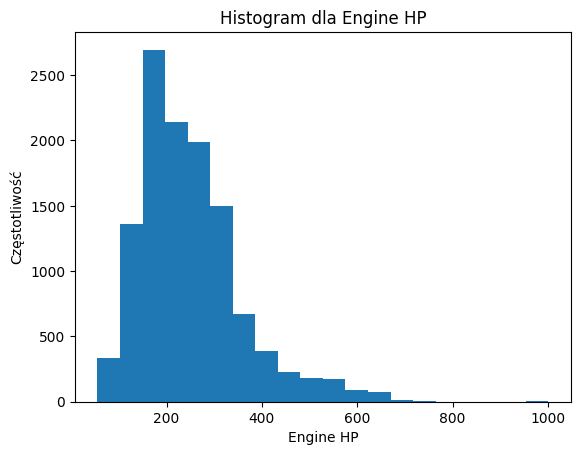

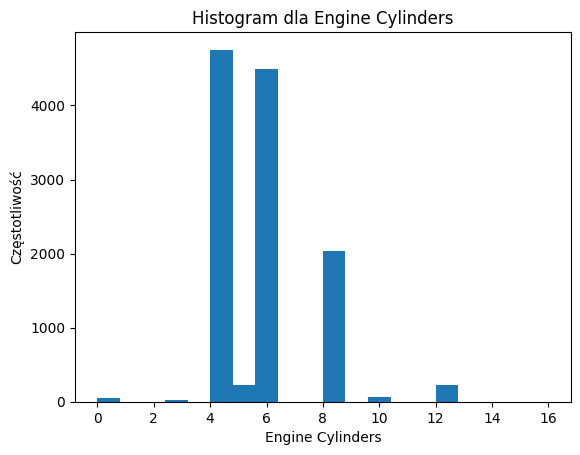

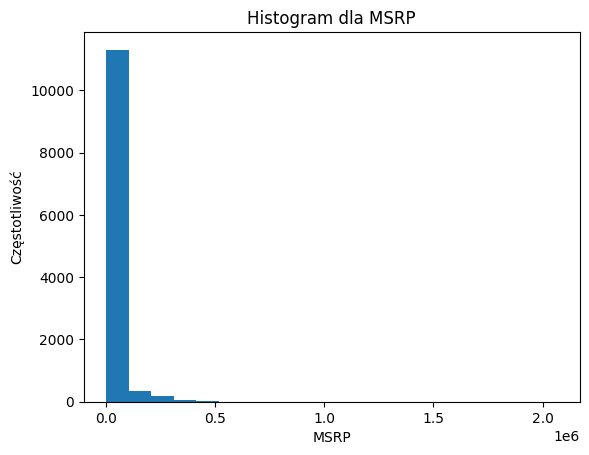

In [26]:
import matplotlib.pyplot as plt

# Utwórz histogramy i wykresy pudełkowe dla wybranych zmiennych

columns_to_analyze = ['Engine HP', 'Engine Cylinders', 'MSRP']

for column in columns_to_analyze:
  # Histogram
  plt.figure()
  plt.hist(df[column], bins=20)
  plt.title(f'Histogram dla {column}')
  plt.xlabel(column)
  plt.ylabel('Częstotliwość')
  plt.show()



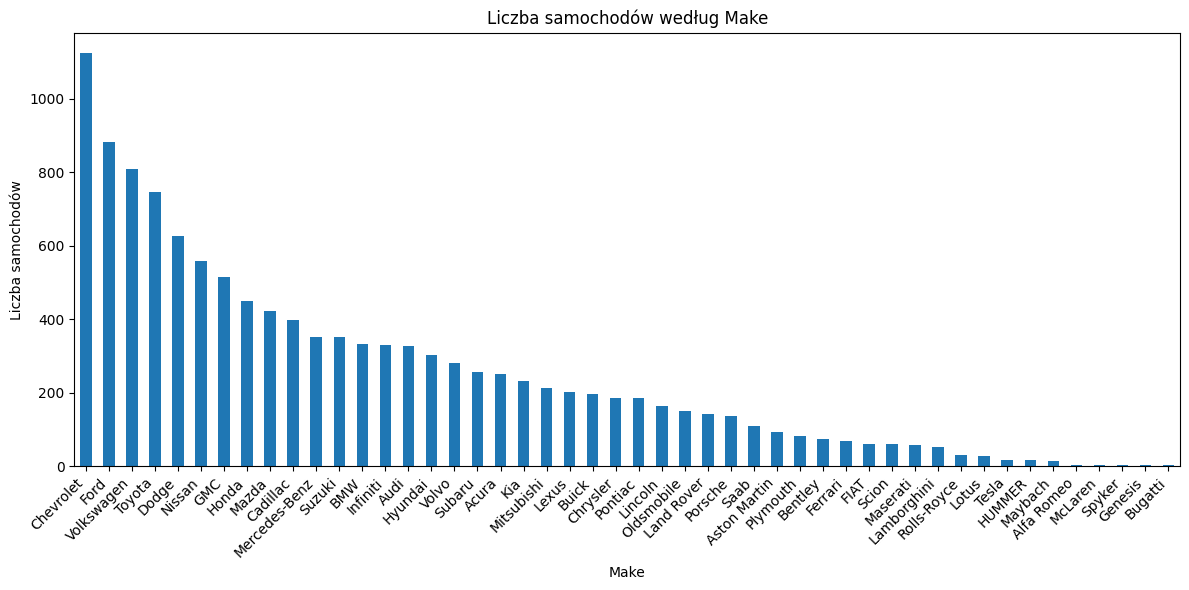

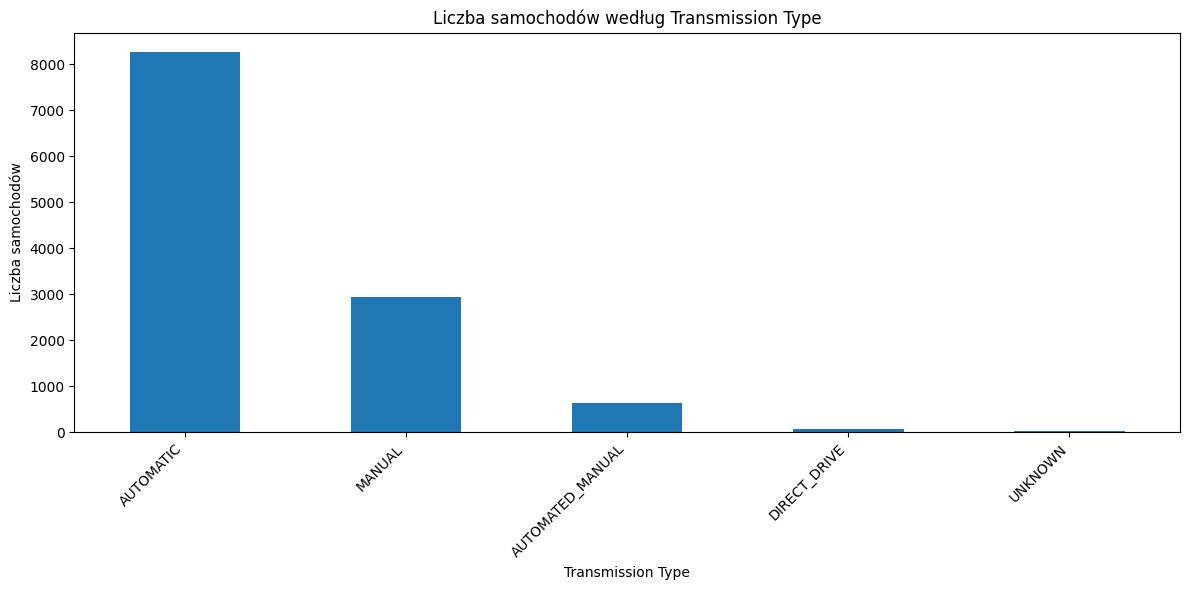

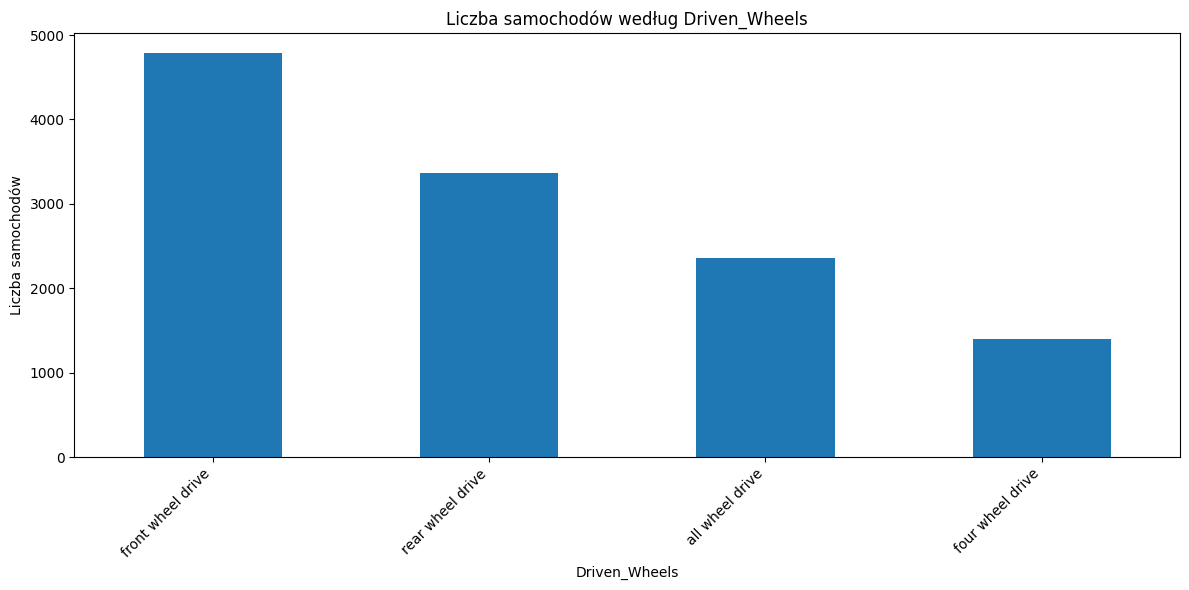

In [28]:
# Wykresy słupkowe dla zmiennych kategorycznych

categorical_columns = ['Make', 'Transmission Type', 'Driven_Wheels']

for column in categorical_columns:
  plt.figure(figsize=(12, 6))
  df[column].value_counts().plot(kind='bar')
  plt.title(f'Liczba samochodów według {column}')
  plt.xlabel(column)
  plt.ylabel('Liczba samochodów')
  plt.xticks(rotation=45, ha='right') # Obrót etykiet osi X dla lepszej czytelności
  plt.tight_layout() # Dopasowanie układu, aby etykiety osi X się nie nakładały
  plt.show()

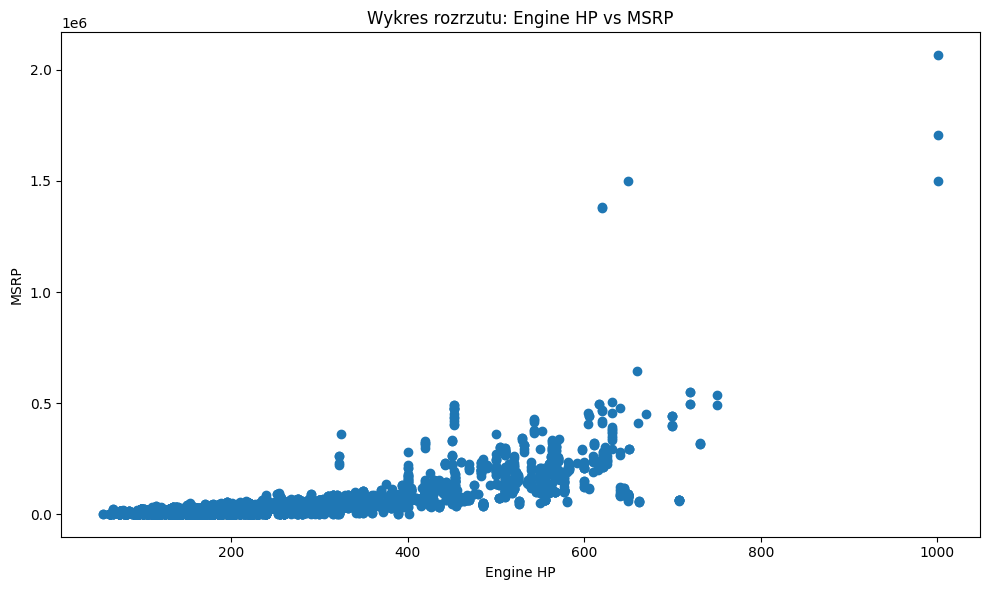

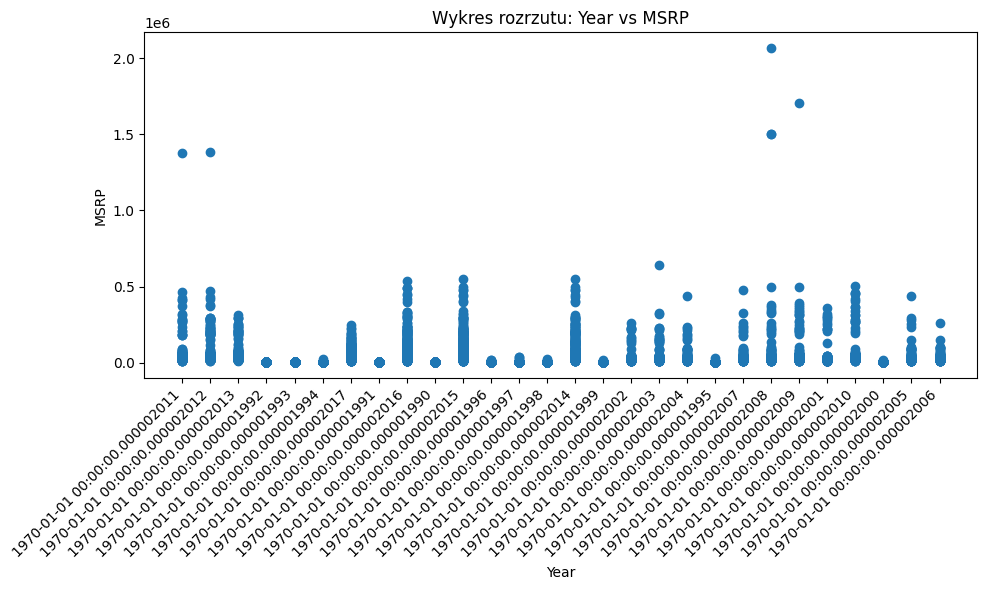

In [33]:
import matplotlib.pyplot as plt

# Wykresy rozrzutu dla badania zależności

scatter_pairs = [
    ('Engine HP', 'MSRP'),
    ('Year', 'MSRP'),
    # Dodaj tutaj inne pary kolumn, które chcesz zbadać
]

for column1, column2 in scatter_pairs:
  plt.figure(figsize=(10, 6))
  if column1 == 'Year':
    plt.scatter(df[column1].astype(str), df[column2])  # Konwersja "Year" na string
    plt.xticks(rotation=45, ha='right')  # Obrót etykiet osi X
  else:
    plt.scatter(df[column1], df[column2])
  plt.title(f'Wykres rozrzutu: {column1} vs {column2}')
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.tight_layout()
  plt.show()

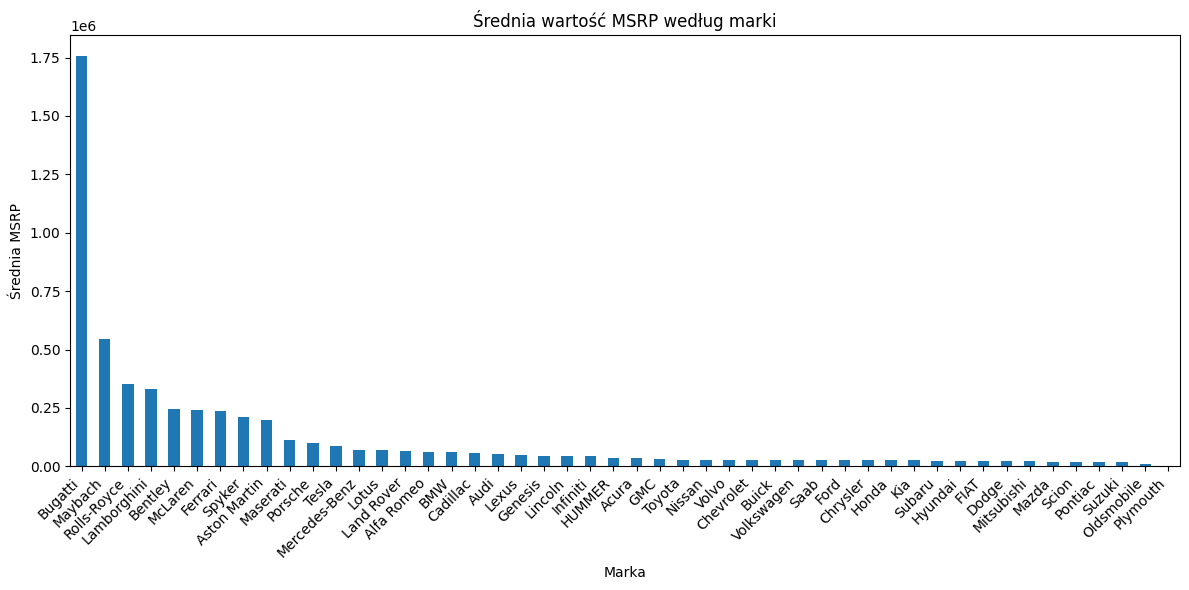

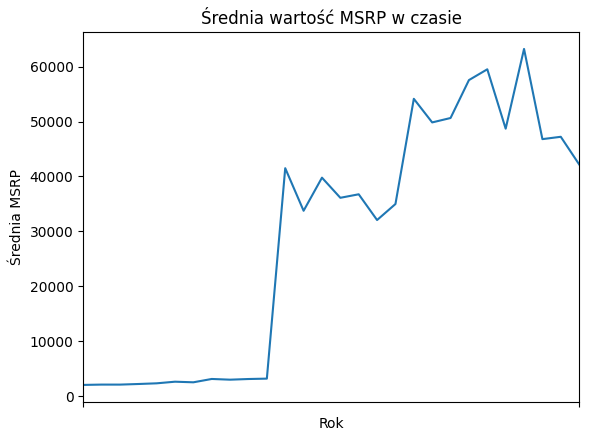

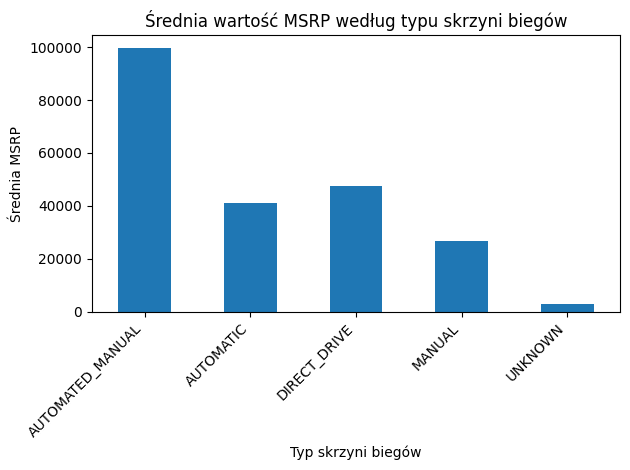

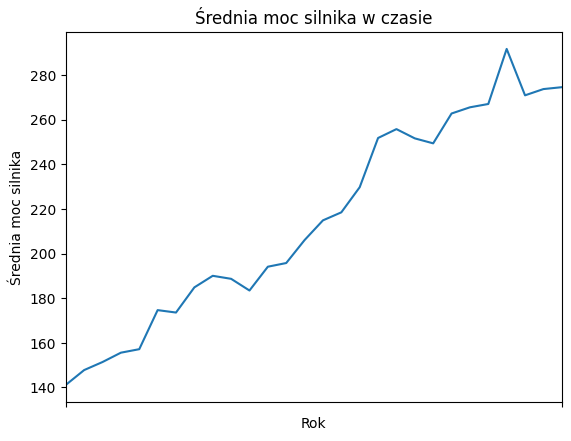

In [34]:
# ANALIZA GRUPOWA

import matplotlib.pyplot as plt

# Analiza średniej wartości MSRP dla różnych grupowań

# Grupowanie według marki
make_msrp = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
make_msrp.plot(kind='bar')
plt.title('Średnia wartość MSRP według marki')
plt.xlabel('Marka')
plt.ylabel('Średnia MSRP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Grupowanie według roku
year_msrp = df.groupby('Year')['MSRP'].mean()
plt.figure()
year_msrp.plot(kind='line')
plt.title('Średnia wartość MSRP w czasie')
plt.xlabel('Rok')
plt.ylabel('Średnia MSRP')
plt.show()

# Grupowanie według typu skrzyni biegów
transmission_msrp = df.groupby('Transmission Type')['MSRP'].mean()
plt.figure()
transmission_msrp.plot(kind='bar')
plt.title('Średnia wartość MSRP według typu skrzyni biegów')
plt.xlabel('Typ skrzyni biegów')
plt.ylabel('Średnia MSRP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Dodaj inne grupowania i analizy tutaj...

# Analiza zmian średniej mocy silnika w czasie
year_hp = df.groupby('Year')['Engine HP'].mean()
plt.figure()
year_hp.plot(kind='line')
plt.title('Średnia moc silnika w czasie')
plt.xlabel('Rok')
plt.ylabel('Średnia moc silnika')
plt.show()

Średnia MSRP według Make:

Make
Bugatti          1.757224e+06
Maybach          5.462219e+05
Rolls-Royce      3.511306e+05
Lamborghini      3.315673e+05
Bentley          2.471693e+05
McLaren          2.398050e+05
Ferrari          2.382188e+05
Spyker           2.133233e+05
Aston Martin     1.979104e+05
Maserati         1.142077e+05
Porsche          1.016224e+05
Tesla            8.525556e+04
Mercedes-Benz    7.147623e+04
Lotus            6.918828e+04
Land Rover       6.782322e+04
Alfa Romeo       6.160000e+04
BMW              6.154676e+04
Cadillac         5.623132e+04
Audi             5.345211e+04
Lexus            4.754907e+04
Genesis          4.661667e+04
Lincoln          4.283983e+04
Infiniti         4.239421e+04
HUMMER           3.646441e+04
Acura            3.488759e+04
GMC              3.049330e+04
Toyota           2.903002e+04
Nissan           2.858343e+04
Volvo            2.854116e+04
Chevrolet        2.835039e+04
Buick            2.820661e+04
Volkswagen       2.810238e+04
Saab    

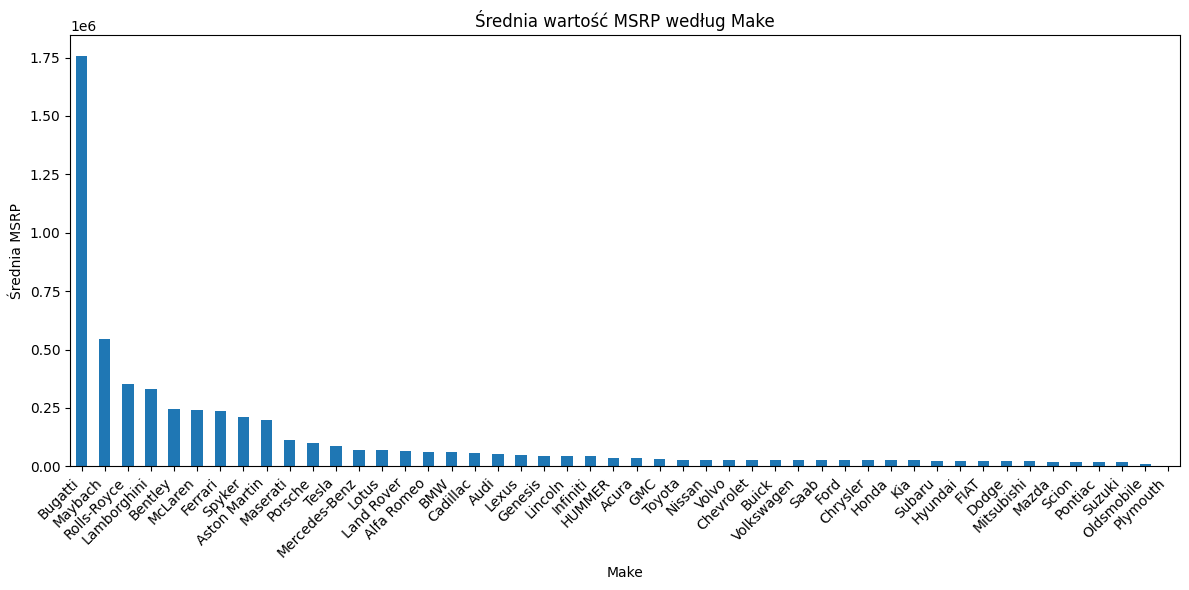




Średnia MSRP według Year:

Year
1970-01-01 00:00:00.000002014    63226.363328
1970-01-01 00:00:00.000002012    59516.235142
1970-01-01 00:00:00.000002011    57548.178947
1970-01-01 00:00:00.000002008    54138.916905
1970-01-01 00:00:00.000002010    50642.496644
1970-01-01 00:00:00.000002009    49838.559367
1970-01-01 00:00:00.000002013    48698.502732
1970-01-01 00:00:00.000002016    47220.743162
1970-01-01 00:00:00.000002015    46794.461290
1970-01-01 00:00:00.000002017    42191.534173
1970-01-01 00:00:00.000002001    41500.666667
1970-01-01 00:00:00.000002003    39774.063025
1970-01-01 00:00:00.000002005    36746.971831
1970-01-01 00:00:00.000002004    36107.336170
1970-01-01 00:00:00.000002007    34974.194203
1970-01-01 00:00:00.000002002    33744.156098
1970-01-01 00:00:00.000002006    32056.468293
1970-01-01 00:00:00.000002000     3166.669492
1970-01-01 00:00:00.000001997     3105.211429
1970-01-01 00:00:00.000001999     3096.158333
1970-01-01 00:00:00.000001998     2975.597403

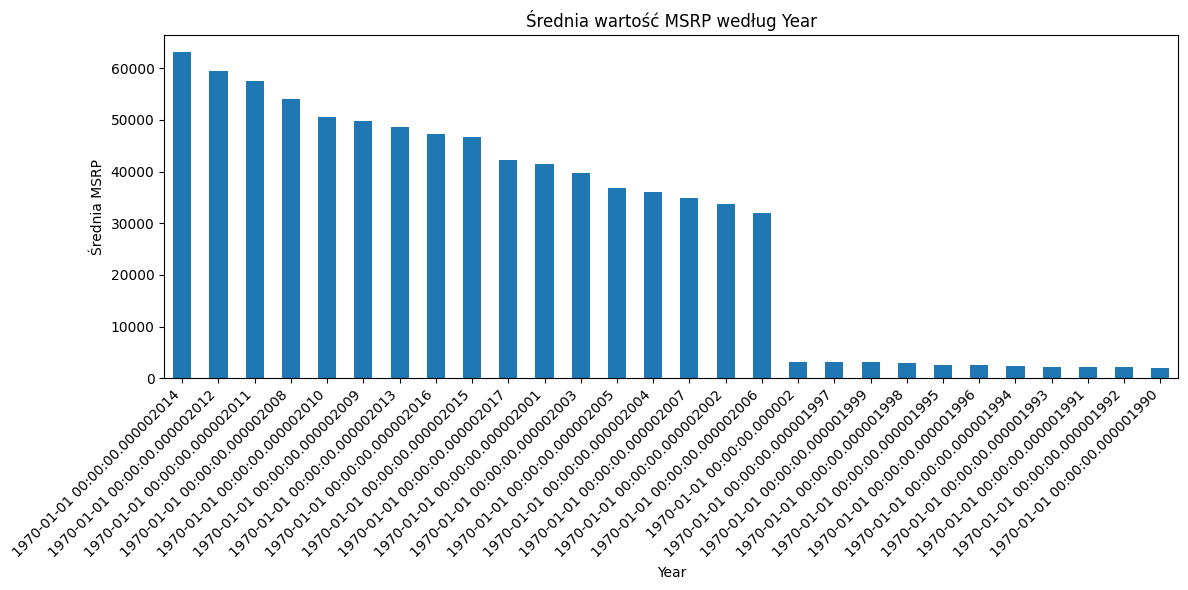




Średnia MSRP według Transmission Type:

Transmission Type
AUTOMATED_MANUAL    99508.370607
DIRECT_DRIVE        47351.250000
AUTOMATIC           41110.331720
MANUAL              26663.644293
UNKNOWN              3040.736842
Name: MSRP, dtype: float64


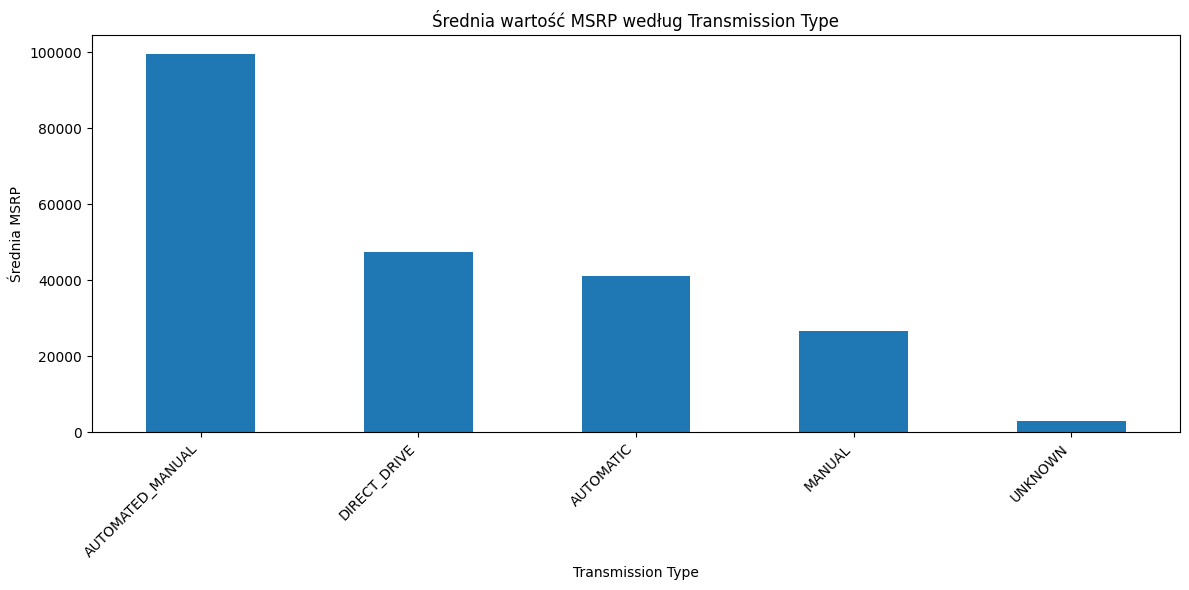




Średnia MSRP według Driven_Wheels:

Driven_Wheels
all wheel drive      58693.884828
rear wheel drive     55064.830317
four wheel drive     35312.039914
front wheel drive    23056.747650
Name: MSRP, dtype: float64


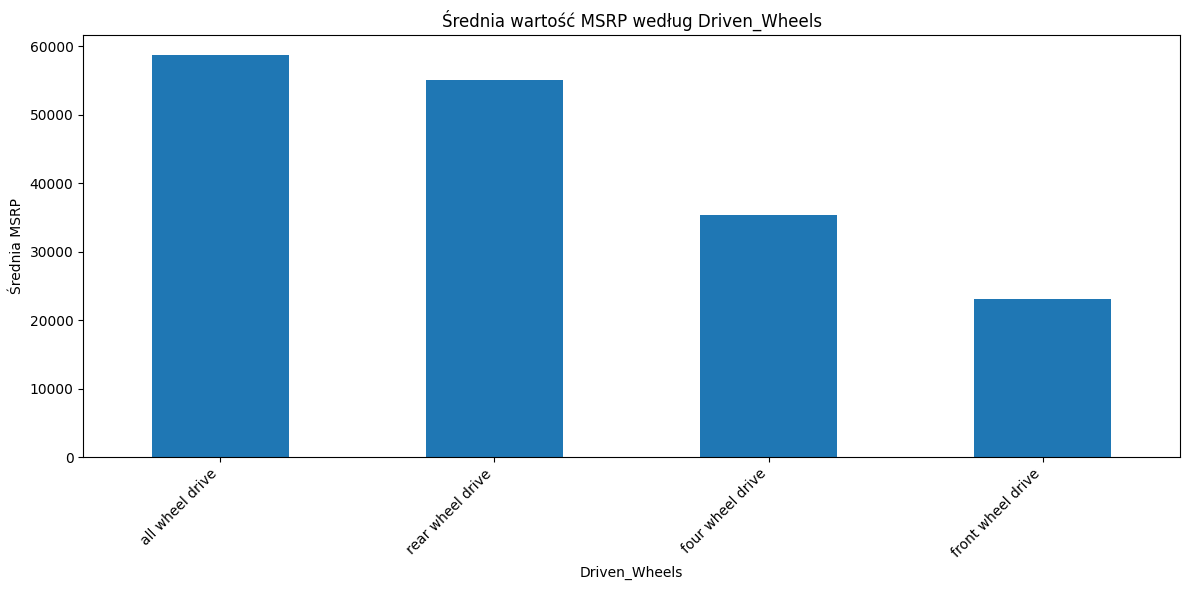




Średnia MSRP według Vehicle Style:

Vehicle Style
Convertible            84224.284994
Coupe                  76248.322048
4dr SUV                40421.871785
Sedan                  39270.689633
Crew Cab Pickup        37220.466960
Passenger Van          29015.203125
Passenger Minivan      25621.050360
Wagon                  25557.939189
Extended Cab Pickup    22488.776886
4dr Hatchback          22420.866097
Cargo Minivan          20920.985915
Convertible SUV        17424.137931
2dr Hatchback          16867.713439
Regular Cab Pickup     15953.709184
Cargo Van              15280.221053
2dr SUV                10115.188406
Name: MSRP, dtype: float64


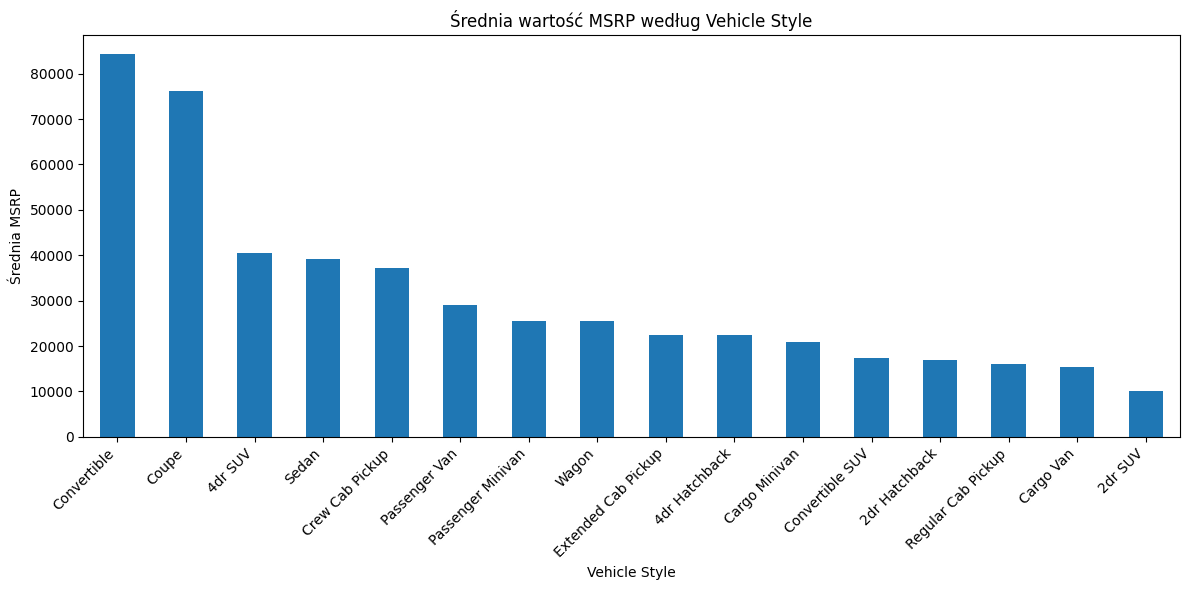

In [35]:
# Oblicz średnią MSRP dla samochodów pogrupowanych według marki, roku i innych odpowiednich kategorii. Określ, które kategorie mają wyższe lub niższe ceny.

import matplotlib.pyplot as plt

# Obliczenie średniej MSRP dla różnych grupowań i identyfikacja kategorii z wyższymi/niższymi cenami

grouping_columns = ['Make', 'Year', 'Transmission Type', 'Driven_Wheels', 'Vehicle Style']

for column in grouping_columns:
  grouped_msrp = df.groupby(column)['MSRP'].mean().sort_values(ascending=False)

  print(f"Średnia MSRP według {column}:\n")
  print(grouped_msrp)

  plt.figure(figsize=(12, 6))
  grouped_msrp.plot(kind='bar')
  plt.title(f'Średnia wartość MSRP według {column}')
  plt.xlabel(column)
  plt.ylabel('Średnia MSRP')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

  print("\n\n")

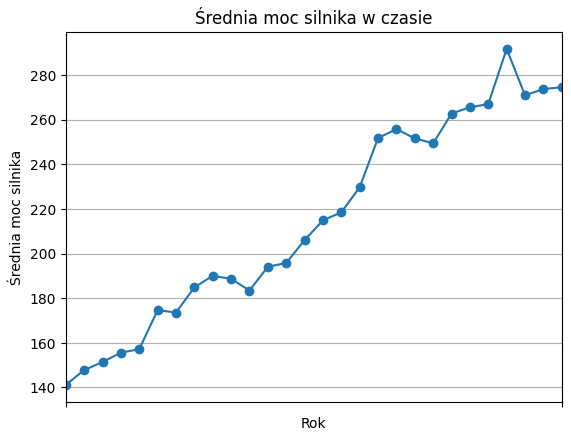

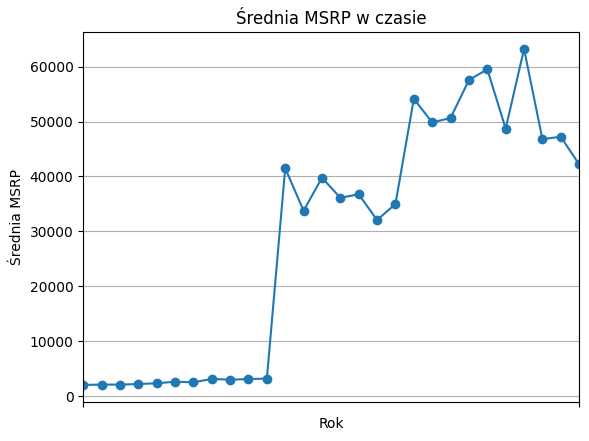

In [36]:
# Przeanalizuj trendy w czasie, sprawdzając, jak zmieniała się średnia moc konia lub MSRP w poszczególnych latach.


# Analiza trendów w czasie dla średniej mocy i MSRP

# Średnia moc silnika w czasie
year_hp = df.groupby('Year')['Engine HP'].mean()
plt.figure()
year_hp.plot(kind='line', marker='o')
plt.title('Średnia moc silnika w czasie')
plt.xlabel('Rok')
plt.ylabel('Średnia moc silnika')
plt.grid(True)
plt.show()

# Średnia MSRP w czasie
year_msrp = df.groupby('Year')['MSRP'].mean()
plt.figure()
year_msrp.plot(kind='line', marker='o')
plt.title('Średnia MSRP w czasie')
plt.xlabel('Rok')
plt.ylabel('Średnia MSRP')
plt.grid(True)
plt.show()

Make
Bugatti          1.757224e+06
Maybach          5.462219e+05
Rolls-Royce      3.511306e+05
Lamborghini      3.315673e+05
Bentley          2.471693e+05
McLaren          2.398050e+05
Ferrari          2.382188e+05
Spyker           2.133233e+05
Aston Martin     1.979104e+05
Maserati         1.142077e+05
Porsche          1.016224e+05
Tesla            8.525556e+04
Mercedes-Benz    7.147623e+04
Lotus            6.918828e+04
Land Rover       6.782322e+04
Alfa Romeo       6.160000e+04
BMW              6.154676e+04
Cadillac         5.623132e+04
Audi             5.345211e+04
Lexus            4.754907e+04
Genesis          4.661667e+04
Lincoln          4.283983e+04
Infiniti         4.239421e+04
HUMMER           3.646441e+04
Acura            3.488759e+04
GMC              3.049330e+04
Toyota           2.903002e+04
Nissan           2.858343e+04
Volvo            2.854116e+04
Chevrolet        2.835039e+04
Buick            2.820661e+04
Volkswagen       2.810238e+04
Saab             2.741350e+04
Ford 

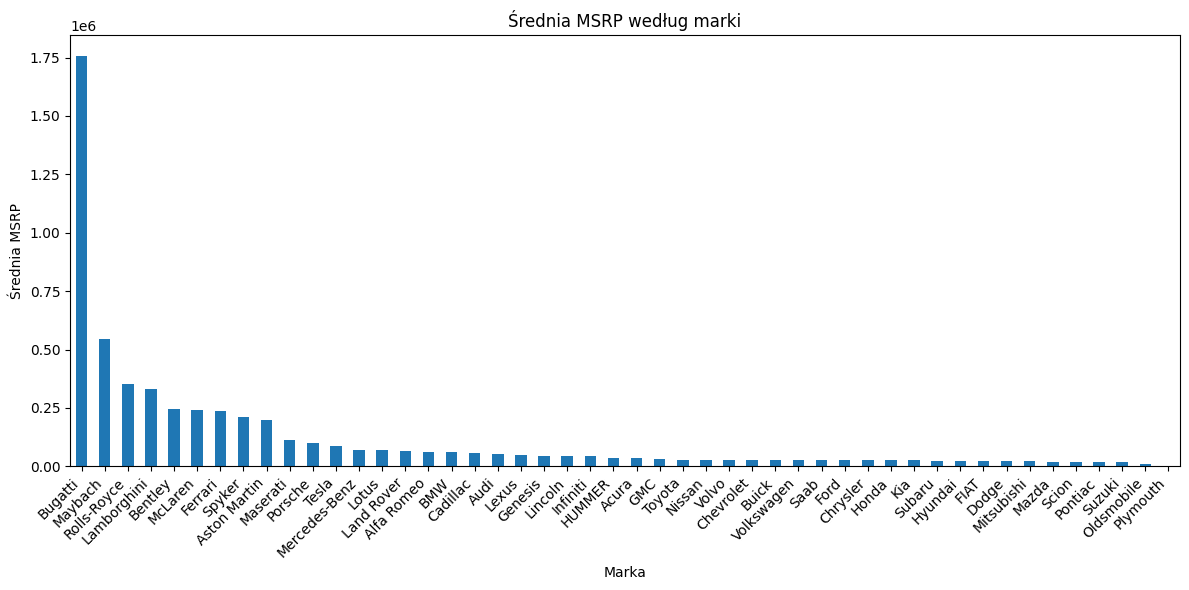

In [39]:
# OPTIONAL TASK:Analiza korelacji

# Obliczenie średniej MSRP dla każdej marki
mean_msrp_by_make = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False)

print(mean_msrp_by_make)

# Wykres słupkowy średniej MSRP dla każdej marki
plt.figure(figsize=(12, 6))
mean_msrp_by_make.plot(kind='bar')
plt.title('Średnia MSRP według marki')
plt.xlabel('Marka')
plt.ylabel('Średnia MSRP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()